# Project: Reducing Traffic Mortality Using Kmeans 

###Presented by : Naaima BEN KADOUR 

###Supervied by : Mr. Mohammed Yasin Shah

###Company : Technocolabs softwares


### Read in and get an overview of the data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path of the file to read
miles_filepath = "miles-driven.csv"
accidents_filepath = "road-accidents.csv"

# Read the file into a variable fifa_data
miles_data = pd.read_csv(miles_filepath,  sep = '|')
accidents_data = pd.read_csv(accidents_filepath, comment = '#', sep = '|',index_col="state")


In [3]:
miles_data.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [4]:
accidents_data.head()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
state,,,,
Alabama,18.8,39,30,80
Alaska,18.1,41,25,94
Arizona,18.6,35,28,96
Arkansas,22.4,18,26,95
California,12.0,35,28,89


 ##### Description of the data #####

 '# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)',

 '# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',

 '# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
 
 '# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)',

In [5]:
# Generate an overview of the DataFrame
car_acc_information = accidents_data.info()
car_acc_information

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drvr_fatl_col_bmiles  51 non-null     float64
 1   perc_fatl_speed       51 non-null     int64  
 2   perc_fatl_alcohol     51 non-null     int64  
 3   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB


### Create a textual and a graphical summary of the data


Text(0, 0.5, "Number of drivers involved in fatal collisions per billion miles (2011)', ")

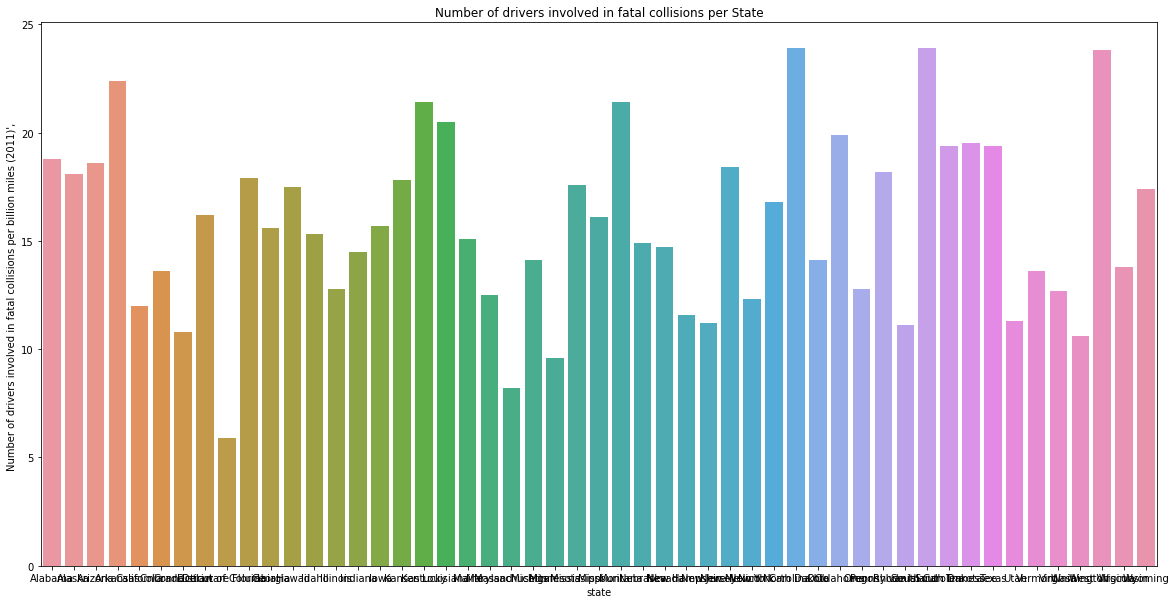

In [27]:
#barplot
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Number of drivers involved in fatal collisions per State")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=accidents_data.index, y=accidents_data['drvr_fatl_col_bmiles'])

plt.ylabel("Number of drivers involved in fatal collisions per billion miles (2011)', ")


In [7]:
describe = accidents_data.describe()
describe

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


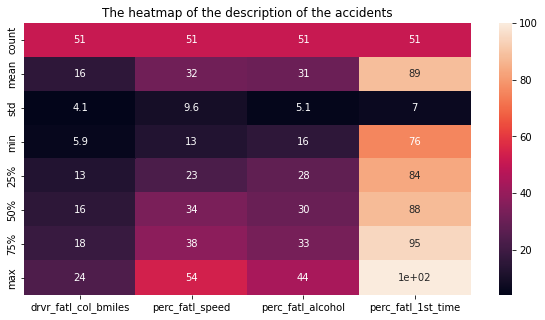

In [26]:
#heatmap

# Set the width and height of the figure
plt.figure(figsize=(10,5))

# Add title
plt.title("The heatmap of the description of the accidents")


sns.heatmap(data=describe, annot=True)


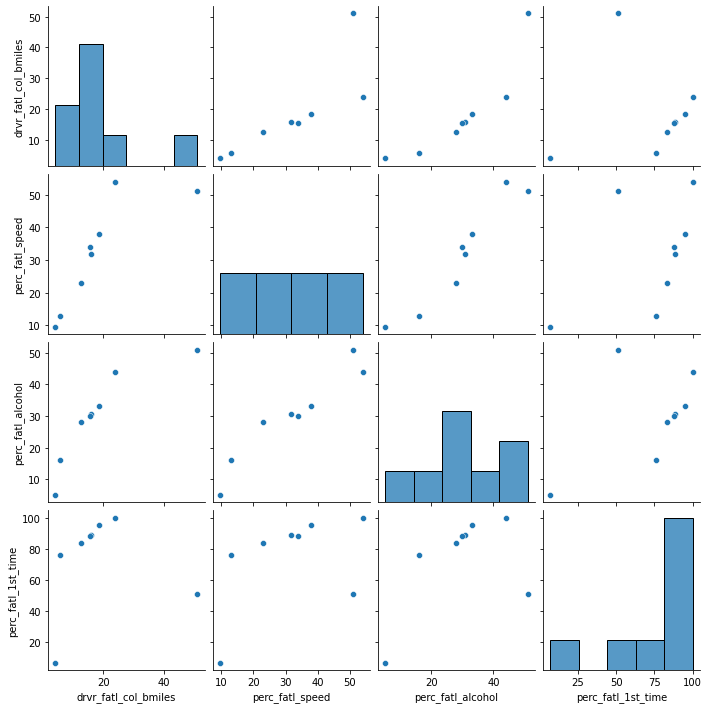

In [9]:
sns.pairplot(describe)

### Quantify the association of features and accidents

In [10]:
# Compute the correlation coefficent for all column pairs
corr = accidents_data.corr()
corr

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


### Fit a multivariate linear regression

In [11]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
x = accidents_data[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
y = accidents_data['drvr_fatl_col_bmiles']

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(x, y)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

### Perform PCA on standardized data

The cumulative variance of the first two principal components is 0.7947


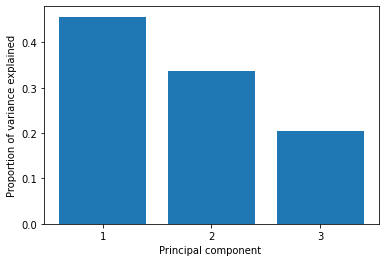

In [12]:
import numpy as np

# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)
# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component ')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

### Visualize the first two principal components


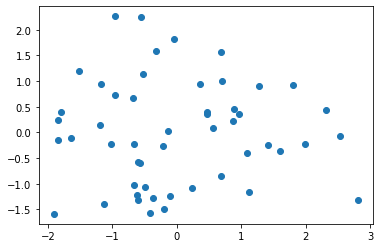

In [13]:
# Transform the scaled features using two principal components
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

### Find clusters of similar states in the data







It was not entirely clear from the PCA scatter plot how many groups in which the states cluster. To assist with identifying a reasonable number of clusters, we can use KMeans clustering by creating a scree plot and finding the "elbow", which is an indication of when the addition of more clusters does not add much explanatory power.


In [22]:

# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    



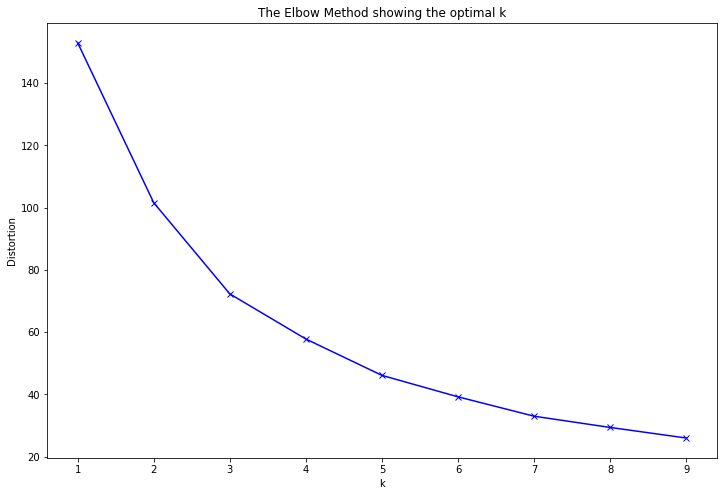

In [24]:
plt.figure(figsize=(12,8))
plt.plot(ks, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### KMeans to visualize clusters in the PCA scatter plot


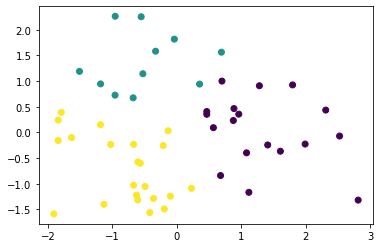

In [18]:
# Create a KMeans object with 3 clusters, use random_state=8 
kmeansObj = KMeans(n_clusters = 3, random_state = 8)

# Fit the data to the `kmeansObj` object
kmeansObj.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:, 0], p_comps[:, 1], c = kmeansObj.labels_)